At the end of this step, you will understand the concepts of underfitting and overfitting, and you will be able to apply these ideas to make your models more accurate.    
이 단계에 끝에서 당신은 과소적합과 과적합의 개념을 이해 할 수 있을 것이고 더 정확한 모델을 만들 수 있습니다.

### Experimenting With Different Models
Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?    
이제 모형 정확도를 측정할 수 있는 신뢰할 수 있는 방법이 생겼으므로 대체 모형을 실험하고 어떤 모형이 최상의 예측을 제공하는지 확인할 수 있습니다. 하지만 모델에 대한 대안은 무엇입니까?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree   
sk-learn의 문서에서 의사결정트리 모형에는 많은 옵션(원하거나 오랫동안 필요로 하는 것 이상으로)을 볼 수있다.



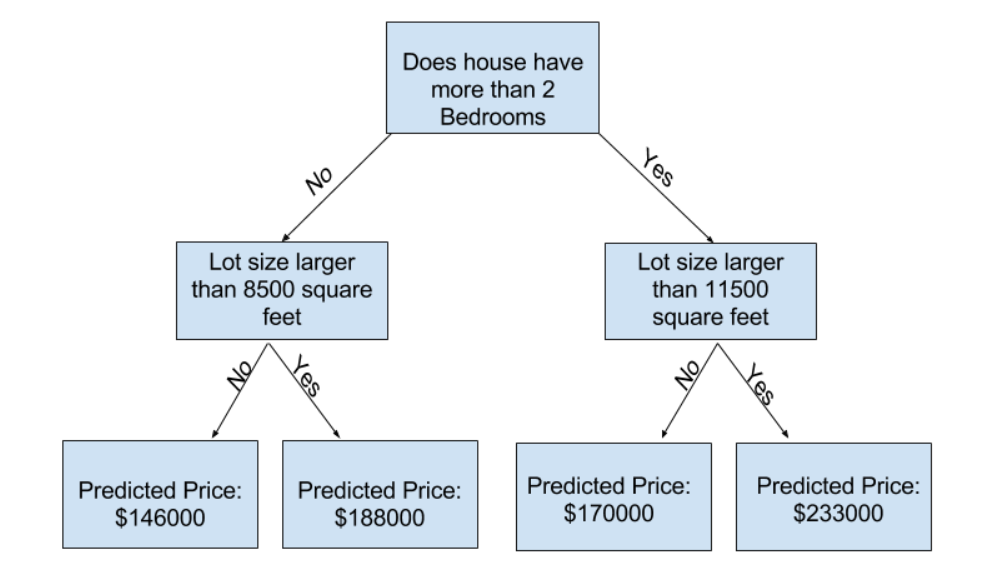

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  2^10 groups of houses by the time we get to the 10th level. That's 1024 leaves.   
실제로, 나무 한 그루가 꼭대기와 잎 사이에 10개의 갈라짐이 있는건 드문 일은 아니다. 나무가 깊어지면 데이터셋은 더 적은 집으로 분할한다.


When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).    
집을 여러 잎으로 나누면 각 잎에 있는 집의 수도 줄어든다. 매우 적은 집의 잎들은 실제 집들에 매우 근접한 예측을 하지만 새로운 데이터에서는 신뢰할 수 없을 수도 있다(각 예측이 적은 수의 집들을 기반하기 때문에)

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.    
모델과 훈련 데이터가 거의 맞을 수 있지만 다른 새로운 데이터와 검증에서는 정확하지 않는 현상을 과적합이라고 부른다. 반면에, 우리가 얕은 나무를 만들면 나무는 집들을 뚜렷한 그룹으로 만들지 않습니다.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.                
극단적으로 나무가 집들을 2개혹은 4개로 나눈다면 각 그룹은 여전히 다양한 집이 있습니다. 학습데이터에서도 대부분의 예측 결과는 크게 벗어날 수있다.(같은이유로 모델검증에서 좋지 않을 수 있다.)

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.   
우리는 검증 데이터를 통해 추정하는 새로운 데이터의 정확성을 중요하게 생각하므로, 과소 맞춤과 과대 맞춤 사이의 최적의 지점을 찾고자 합니다. 시각적으로는 아래 그림에서 (빨간색) 유효성 검사 곡선의 최저점이 필요합니다.   
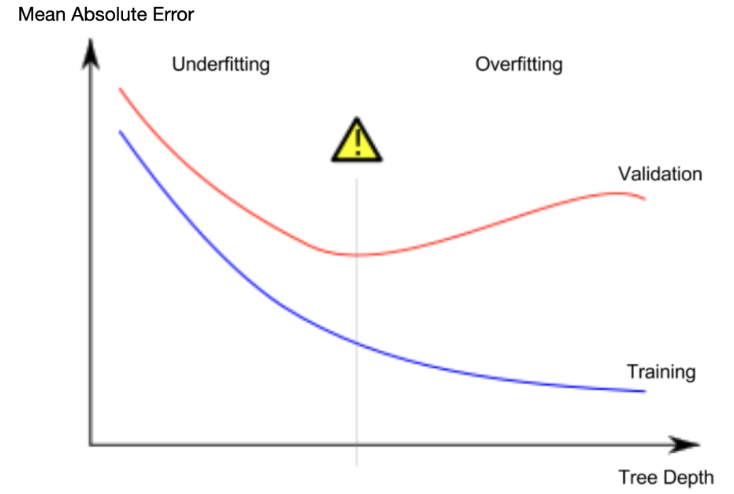


### Example
There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.    
트리 깊이를 제어하는 몇 가지 대안이 있으며, 많은 대안은 트리를 통과하는 일부 경로가 다른 경로보다 더 깊은 깊이를 가질 수 있도록 허용합니다. 하지만 max_leaf_nodes 인수는 과적합과 과소적합을 제어할 수 있는 매우 합리적인 방법을 제공합니다. 모델에 더 많은 잎을 만들도록 허용할수록 위 그래프에서 과적합 영역에서 과적합 영역으로 더 많이 이동합니다.  


We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:    
유틸리티 함수를 사용하여 max_leaf_nodes에 대한 다양한 값의 MAE 점수를 비교할 수 있습니다:

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

The data is loaded into train_X, val_X, train_y and val_y using the code you've already seen (and which you've already written).   
사용했던 코드를 이용해 데이터는 train_X, val_X, train_y, val_y에 불러져 왔다.

In [1]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
melbourne_file_path = r'C:\Users\kr937\Desktop\drive\Kaggle\house price data\melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.   
for-loop문을 사용해 max_leaf_nodes에 대해 서로다른 값으로 만든 모델의 정확성을 비교할 수 있다. 

In [3]:
# compare MAE with differing values of max_leaf_nodes
# max_leaf_nodes의 서로 다른값과 MAE의 비교
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983


Of the options listed, 500 is the optimal number of leaves.
정렬된 옵션들 중 500이 잎들 중 최적의 숫자이다.

Conclusion(결론)   
Here's the takeaway: Models can suffer from either:
요점은 다음과 같다. 모델은 다음과 같은 문제를 겪을 수있다.

Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.   

Overfitting: 후에 반복되지 않을 패턴을 포착하여 예측 정확도가 떨어지거나   
Underfitting: 관련된 패턴은 포착하지 못해 예측 정확도를 또 다시 떨어뜨리는 것이다.   
모델 교육에 사용되지 않는 검증 데이터를 사용하여 후보 모델의 정확성을 측정합니다. 많은 후보 모델을 시도하고 최고의 모델을 유지할 수있습니다. 
